In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 

df = pd.read_csv("gaming_processed_3.csv")
new_df = df.dropna(subset=['SPIN_T'])

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

# Assuming you have the 'new_df' from the previous steps

# 1. Create Empty Arrays for Each Category

singleplayer_spin_t = np.array([])
multiplayer_strangers_spin_t = np.array([])
multiplayer_unknown_spin_t = np.array([])
multiplayer_offline_spin_t = np.array([])
multiplayer_online_spin_t = np.array([])
multiplayer_with_friends_spin_t = np.array([])

# 2. Loop through DataFrame and Populate Arrays

for index, row in new_df.iterrows():
    category = row["Playstyle_category"]
    spin_t_value = row["SPIN_T"]
    
    if category == "Singleplayer":
        singleplayer_spin_t = np.append(singleplayer_spin_t, spin_t_value)
    elif category == "Multiplayer with Strangers":
        multiplayer_strangers_spin_t = np.append(multiplayer_strangers_spin_t, spin_t_value)
    elif category == "Multiplayer - Offline":
        multiplayer_offline_spin_t = np.append(multiplayer_offline_spin_t, spin_t_value)
    elif category == "Multiplayer - Online":
        multiplayer_online_spin_t = np.append(multiplayer_online_spin_t, spin_t_value)
    elif category == "Multiplayer with Friends":
        multiplayer_with_friends_spin_t = np.append(multiplayer_with_friends_spin_t, spin_t_value)

import pandas as pd
import numpy as np
from scipy import stats

# Assuming you have the 'new_df' and arrays created as before

# 1. Perform Kruskal-Wallis H Test
h_statistic, p_value = stats.kruskal(singleplayer_spin_t, 
                                      multiplayer_strangers_spin_t, 
                                      multiplayer_offline_spin_t,
                                      multiplayer_online_spin_t,
                                      multiplayer_with_friends_spin_t)

print("H-statistic:", h_statistic)
print("p-value:", p_value)

H-statistic: 226.55725363414504
p-value: 7.272478885006326e-48


In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming you have the 'new_df' and arrays created as before

# Define a dictionary to store the arrays for each category
category_arrays = {
    "Singleplayer": singleplayer_spin_t,
    "Multiplayer with Strangers": multiplayer_strangers_spin_t,
    "Multiplayer - Offline": multiplayer_offline_spin_t,
    "Multiplayer - Online": multiplayer_online_spin_t,
    "Multiplayer with Friends": multiplayer_with_friends_spin_t
}

# Loop through each category and create Q-Q plot
for category, data in category_arrays.items():
    sm.qqplot(data, line='s')
    plt.title(f"Q-Q Plot for SPIN_T Scores in {category}")
    filename = f"qqplot_{category}.png"  # Define filename
    plt.grid(True)
    plt.savefig(filename)  # Save Q-Q plot
    plt.close()  # Close the current plot


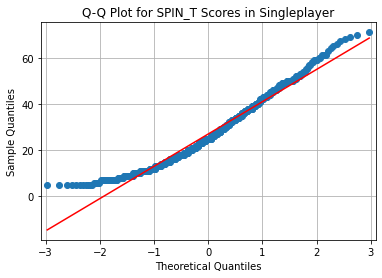

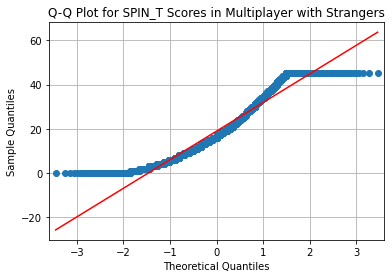

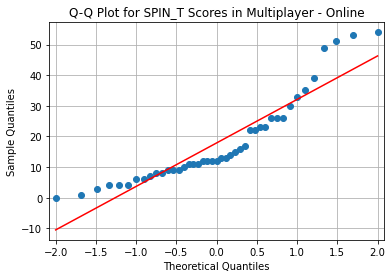

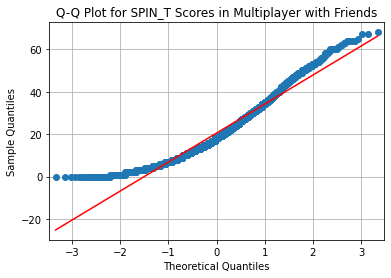

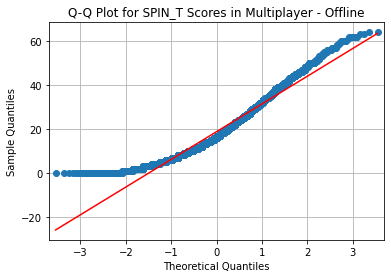

In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming you have the 'new_df' from the previous steps and arrays created as before

# Create a list of arrays for each category
categories = [singleplayer_spin_t, multiplayer_strangers_spin_t, multiplayer_offline_spin_t, multiplayer_online_spin_t, multiplayer_with_friends_spin_t]

# Generate Q-Q plots for each category
for i, category in enumerate(categories):
    sm.qqplot(category, line='s')
    plt.grid(True)
    plt.title(f"Q-Q Plot for SPIN_T Scores in {new_df['Playstyle_category'].unique()[i]}")
    plt.show()


In [5]:
import pandas as pd

# Create a DataFrame with the category labels and corresponding SPIN_T values
data = {
    'Category': ['Singleplayer'] * len(singleplayer_spin_t) + \
                ['Multiplayer with Strangers'] * len(multiplayer_strangers_spin_t) + \
                # ['Multiplayer-Unknown'] * len(multiplayer_unknown_spin_t) + \
                ['Multiplayer - Offline'] * len(multiplayer_offline_spin_t) + \
                ['Multiplayer - Online'] * len(multiplayer_online_spin_t) + \
                ['Multiplayer with Friends'] * len(multiplayer_with_friends_spin_t),
        'SPIN_T': np.concatenate([
        singleplayer_spin_t, 
        multiplayer_strangers_spin_t, 
        # multiplayer_unknown_spin_t, 
        multiplayer_offline_spin_t, 
        multiplayer_online_spin_t, 
        multiplayer_with_friends_spin_t
    ])
}

# Create DataFrame
df_spin_t = pd.DataFrame(data)

# Display the DataFrame
df_spin_t.head()

,Category,SPIN_T
0,Singleplayer,10.0
1,Singleplayer,11.0
2,Singleplayer,35.0
3,Singleplayer,41.0
4,Singleplayer,31.0


In [6]:
import pingouin as pg

# Perform Games-Howell post hoc test
posthoc = pg.pairwise_gameshowell(data=df_spin_t, dv='SPIN_T', between='Category')
print(posthoc)

                            A                           B    mean(A)  \
0       Multiplayer - Offline        Multiplayer - Online  17.883721   
1       Multiplayer - Offline    Multiplayer with Friends  17.883721   
2       Multiplayer - Offline  Multiplayer with Strangers  17.883721   
3       Multiplayer - Offline                Singleplayer  17.883721   
4        Multiplayer - Online    Multiplayer with Friends  20.539984   
5        Multiplayer - Online  Multiplayer with Strangers  20.539984   
6        Multiplayer - Online                Singleplayer  20.539984   
7    Multiplayer with Friends  Multiplayer with Strangers  18.811868   
8    Multiplayer with Friends                Singleplayer  18.811868   
9  Multiplayer with Strangers                Singleplayer  18.974352   

     mean(B)      diff        se          T           df      pval    hedges  
0  20.539984 -2.656263  2.206780  -1.203683    43.355315  0.749236 -0.194450  
1  18.811868 -0.928147  2.196366  -0.422583    42

In [7]:
# Filter pairs with high significance (p < 0.05)
high_significance_pairs = posthoc[posthoc['pval'] < 0.05]
high_significance_pairs

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
3,Multiplayer - Offline,Singleplayer,17.883721,27.008915,-9.125194,2.254548,-4.047460,47.222324,0.001713,-0.651589
4,Multiplayer - Online,Multiplayer with Friends,20.539984,18.811868,1.728116,0.328044,5.267945,4430.918465,0.000001,0.133506
5,Multiplayer - Online,Multiplayer with Strangers,20.539984,18.974352,1.565632,0.349665,4.477515,4993.209093,0.000076,0.118487
6,Multiplayer - Online,Singleplayer,20.539984,27.008915,-6.468932,0.605456,-10.684391,1054.426283,0.000000,-0.471572
8,Multiplayer with Friends,Singleplayer,18.811868,27.008915,-8.197048,0.566325,-14.474095,821.597133,0.000000,-0.642107
9,Multiplayer with Strangers,Singleplayer,18.974352,27.008915,-8.034563,0.579118,-13.873793,895.665537,0.000000,-0.613869
